# Basic Test

In [57]:
from gradient_descent import gradient_descent
from math_functions import *

In [58]:
def cost_function(x):
    return (x[0] - 3) ** 2

gd = gradient_descent(learn_rate=0.1, max_iter=100, tolerance=1e-6)

initial_params = [10]

optimized_params = gd.fit(cost_function, initial_params)

print("Optimized Parameters:", optimized_params)
print("Final Cost:", cost_function(optimized_params))
print("History:", gd.history[-5:])

Optimized Parameters: [3.0000004717990665]
Final Cost: 2.225943591328502e-13
History: [(69, [3.0000011518531897], 1.3267657706637855e-12), (70, [3.0000009214825516], 8.491300928974465e-13), (71, [3.000000737186041], 5.434432591924646e-13), (72, [3.000000589748833], 3.4780368588317735e-13), (73, [3.0000004717990665], 2.225943591328502e-13)]


# Test for linear regression

In [59]:
X_train = [1, 2, 3, 4, 5]
y_train = [2, 4, 6, 8, 10]

In [60]:
def cost_function(params):
    w, b = params
    y_pred = [(w * x + b) for x in X_train]
    return MSE(y_train, y_pred)

In [61]:
gd = gradient_descent(learn_rate=0.01, max_iter=1000, tolerance=1e-6)
optimized_params = gd.fit(cost_function, [0, 0])

print("Optimized Parameters:", optimized_params)
print("Final Cost:", cost_function(optimized_params))

Optimized Parameters: [1.9951803506721477, 0.01740046334000408]
Final Cost: 5.511055187914835e-05


In [62]:
X_test = [6, 7, 8]
y_pred = [optimized_params[0] * x + optimized_params[1] for x in X_test]

print("Predictions:", y_pred)

Predictions: [11.988482567372891, 13.98366291804504, 15.978843268717187]


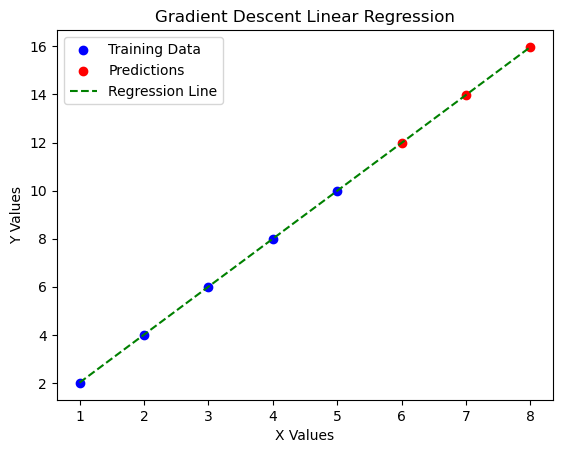

In [63]:
import matplotlib.pyplot as plt

plt.scatter(X_train, y_train, color='blue', label='Training Data')

plt.scatter(X_test, y_pred, color='red', label='Predictions')

X_range = list(range(min(X_train + X_test), max(X_train + X_test) + 1))
y_range = [optimized_params[0] * x + optimized_params[1] for x in X_range]
plt.plot(X_range, y_range, color='green', linestyle='dashed', label='Regression Line')

plt.xlabel('X Values')
plt.ylabel('Y Values')
plt.title('Gradient Descent Linear Regression')
plt.legend()
plt.show()

# Multi-linear-regression

In [64]:
def cost_function(params):
    w = params[:-1]
    b = params[-1]
    y_pred = [sum(w_i * x_i for w_i, x_i in zip(w, x)) + b for x in X_train]
    return MSE(y_train, y_pred)

In [65]:
X_train = [[1, 2], [2, 3], [3, 4], [4, 5], [5, 6]]
y_train = [2, 4, 6, 8, 10]

In [66]:
gd = gradient_descent(learn_rate=0.01, max_iter=1000, tolerance=1e-6)
initial_params = [0.0, 0.0, 0.0]
optimized_params = gd.fit(cost_function, initial_params)

In [67]:
X_test = [[6, 7], [7, 8], [8, 9]]
y_pred = [sum(w_i * x_i for w_i, x_i in zip(optimized_params[:-1], x)) + optimized_params[-1] for x in X_test]
print("Predictions:", y_pred)

Predictions: [11.985909892207738, 13.98017599652841, 15.97444210084908]


In [68]:
final_cost = cost_function(optimized_params)
print("Final Cost:", final_cost)

Final Cost: 7.5437044725299e-05


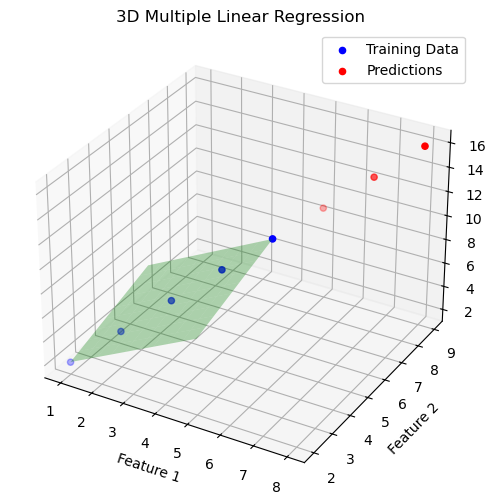

In [69]:
import matplotlib.pyplot as plt
import numpy as np
from mpl_toolkits.mplot3d import Axes3D

X_train_np = np.array(X_train)
y_train_np = np.array(y_train)

X_test_np = np.array(X_test)
y_pred_np = np.array(y_pred)

fig = plt.figure(figsize=(10, 6))
ax = fig.add_subplot(111, projection='3d')

# traiing
ax.scatter(X_train_np[:, 0], X_train_np[:, 1], y_train_np, color='b', label="Training Data")

# prediction
ax.scatter(X_test_np[:, 0], X_test_np[:, 1], y_pred_np, color='r', label="Predictions")

x1_range = np.linspace(min(X_train_np[:, 0]), max(X_train_np[:, 0]), 10)
x2_range = np.linspace(min(X_train_np[:, 1]), max(X_train_np[:, 1]), 10)
X1, X2 = np.meshgrid(x1_range, x2_range)
Y_pred_surface = optimized_params[0] * X1 + optimized_params[1] * X2 + optimized_params[2]

ax.plot_surface(X1, X2, Y_pred_surface, alpha=0.3, color='g')

ax.set_xlabel('Feature 1')
ax.set_ylabel('Feature 2')
ax.set_zlabel('Target')
ax.set_title("3D Multiple Linear Regression")

ax.legend()

plt.show()